In [7]:
import os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# load images 
def load_images_from_folder(folder, csv_file, img_size=(128, 128)):
    labels_df = pd.read_csv(csv_file)
    labels_df['level'] = labels_df['level'].astype(str)  
    
    images = []
    labels = []
    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)
        if os.path.isfile(file_path):
          
            base_name = os.path.splitext(file_name)[0]
           
            label_row = labels_df[labels_df['image'] == base_name]
            if not label_row.empty:
                img = cv2.imread(file_path)
                img = cv2.resize(img, img_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)
                labels.append(label_row.iloc[0]['level'])  
    return np.array(images), labels

In [ ]:

image_folder = 'Untitled Folder'  
csv_file_path = 'retino_trainLabels.csv' 

In [ ]:
# load image
images, labels = load_images_from_folder(image_folder, csv_file_path)

In [11]:
# Preprocess Labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [12]:
# Normalize the images
images = images / 255.0

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [14]:
# Flatten image data for Random Forest
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# model : Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  
)

In [ ]:
# Train  model
y_train_flat = np.argmax(y_train, axis=1)  #one-hot to integer labels
rf_model.fit(X_train_flat, y_train_flat)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [17]:
# Evaluate the model
y_test_flat = np.argmax(y_test, axis=1)
y_pred = rf_model.predict(X_test_flat)

In [18]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_flat, y_pred, target_names=lb.classes_))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      3714
           1       0.00      0.00      0.00       331
           2       0.50      0.01      0.02       768
           3       0.33      0.01      0.01       142
           4       0.00      0.00      0.00       102

    accuracy                           0.74      5057
   macro avg       0.31      0.20      0.18      5057
weighted avg       0.63      0.74      0.63      5057



C:\Users\AlphaBeast\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AlphaBeast\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AlphaBeast\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Function to preprocess the input image
def preprocess_image(file_path, img_size=(128, 128)):
    img = cv2.imread(file_path)
    img = cv2.resize(img, img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0 
    img = img.flatten()  # Flatten the image 
    return img

In [ ]:
#  label names
label_names = {
    0: "No DR",
    1: "Mild",
    2: "Moderate",
    3: "Severe",
    4: " Proliferative DR"
}

In [ ]:
#  path: new image 
new_image_path = 'Untitled Folder/15438_right.jpeg'

# Preprocess image
new_image = preprocess_image(new_image_path)

# Make prediction
new_image = new_image.reshape(1, -1)  
predicted_class = rf_model.predict(new_image)[0]  
predicted_label = label_names[predicted_class]

# Print the result
print(f"Predicted Class: {predicted_class}")
print(f"Predicted Label: {predicted_label}")

Predicted Class: 2
Predicted Label: Moderate


In [39]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Save the trained model
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

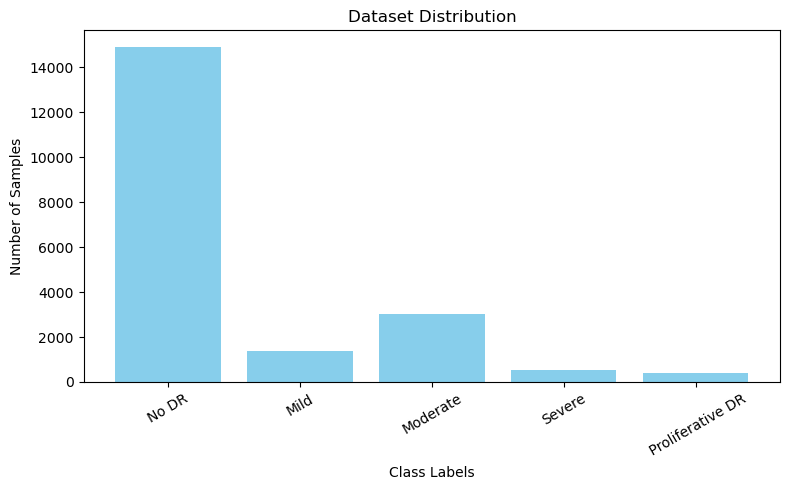

In [57]:
import matplotlib.pyplot as plt
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
label_classes = [label_names[int(label)] for label in unique]
    
    # bar chart
plt.figure(figsize=(8, 5))
plt.bar(label_classes, counts, color='skyblue')
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Dataset Distribution")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [59]:
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

{0: 14897, 1: 1376, 2: 3012, 3: 522, 4: 420}
